In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
#import xgboost
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
sns.set(style="white")
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import KFold

In [2]:
path = "C://Users//Harsh Khandelwal//Desktop//"

In [6]:
#Reading the training data
input_dat = pd.read_csv(path+"train.csv")

In [3]:
#Reading the training data
test_dat = pd.read_csv("test.csv")

In [7]:
input_dat.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
resp_train = input_dat['loss']
input_dat = input_dat.drop('loss',axis = 1)

**Change the factor levels since label encoder is treating every column differently. Look at cat 2 and cat6.**

In [9]:
label_encoder = LabelEncoder()
input_qual = input_dat.iloc[:, 1:117]
for i in range(0,117):
    input_qual[[i]]  = label_encoder.fit_transform(input_dat[[i]]).reshape(input_dat.shape[0],1)


C:\Users\Harsh Khandelwal\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh Khandelwal\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh Khandelwal\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harsh Khandelwal\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [10]:
# Standard Normal Distribution(0,1)
scaler = preprocessing.StandardScaler()
input_qual = scaler.fit_transform(input_qual)
qual_df = pd.DataFrame(input_qual)
cont_df = input_dat.iloc[:,117:131] 
cont_df = scaler.fit_transform(cont_df)
cont_df = pd.DataFrame(cont_df)

C:\Users\Harsh Khandelwal\Anaconda\lib\site-packages\sklearn\utils\validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [11]:
for_corr_df = pd.concat([qual_df,cont_df],axis = 1)

In [12]:
def correlation_plot(df,vmax):
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax,
                square=True, xticklabels=5, yticklabels=5,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

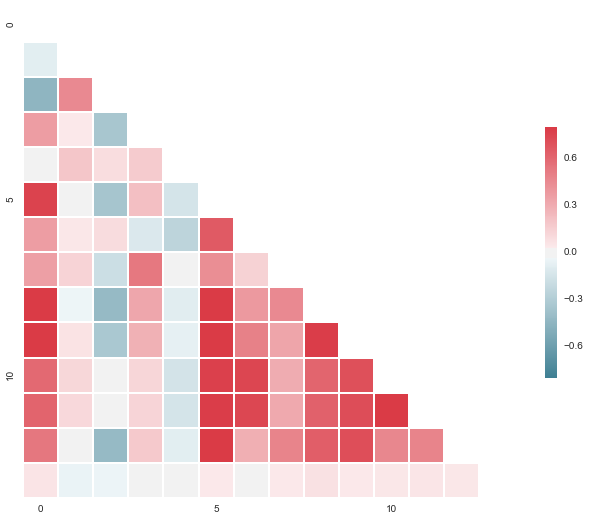

In [13]:
correlation_plot(df = cont_df,vmax = .8)
#Need to apply PCA/MDS here.

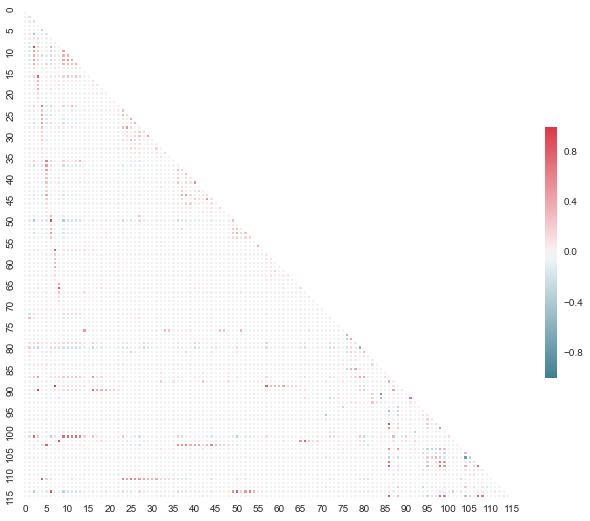

In [14]:
correlation_plot(df = qual_df,vmax = 1)

**AJ NOTES** : #Clustering Or (PCA,MCA) Or Both??
           Pipeline of Feature Selection ==> XgBoost. Would Use GridSearch

In [15]:
from sklearn.decomposition import PCA
def do_pca(data,norm = False):
    if norm == True:
        data = scaler.fit_transform(data)
        data = pd.DataFrame(data)
    else:
        pass
    
    pca = PCA()
    pca_ = pca.fit(data)
    plt.clf()
    plt.plot(pca_.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance')
    
    return(pca_)

In [24]:
np.cumsum(with_pca.explained_variance_)/sum(with_pca.explained_variance_)

array([ 0.43943401,  0.58289042,  0.68992059,  0.76105117,  0.82397151,
        0.87763885,  0.91820106,  0.94645343,  0.9680097 ,  0.98436295,
        0.99410739,  0.99722719,  0.99962665,  1.        ])

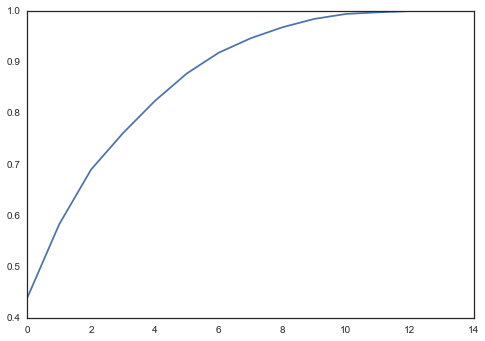

In [21]:
plt.plot(np.cumsum(with_pca.explained_variance_)/sum(with_pca.explained_variance_))

In [1]:
import numpy as np

In [ ]:
np.cum

**AJ Notes : Implement number of components to be returned **

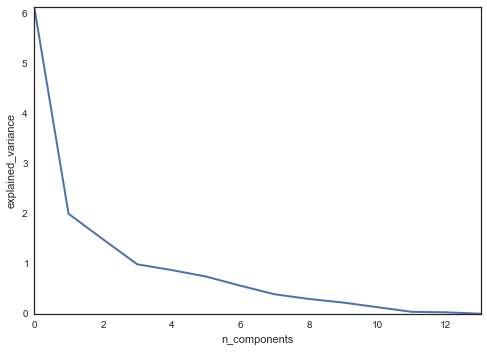

In [16]:
with_pca = do_pca(cont_df)

**XgBoost without any Feature Selection.**


In [26]:
input_dat.shape

(188318, 131)

In [27]:
#One Hot Encoding for Cat data.

qual_one_hot = pd.get_dummies(input_dat.iloc[:, 1:116])
cont_df = input_dat.iloc[:,117:]
#Creating input for Xgboost.
train_df = pd.concat([qual_one_hot,cont_df],axis = 1)

In [11]:
#Memory issues ==> float32.
X = train_df.as_matrix().astype(np.float32)
y = resp_train.as_matrix().astype(np.float32)

**Refer : https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ **
**Xgboost : http://xgboost.readthedocs.io/en/latest/python/python_api.html **

In [13]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6121991)

In [75]:
model = xgboost.XGBRegressor(reg_alpha = 0.2,n_estimators=1000,learning_rate=0.2)

In [76]:
model

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0.2, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

**AJ Notes** Use Grid Search To fine tune the model. Add more hyperparams. Add Cross validation too.

In [78]:
'''clf = GridSearchCV(model,
                   {'max_depth': [8,9,10],
                    'n_estimators': [75,100,125],
                    'reg_alpha' : [0.1,0.2,0.3]}, verbose=1)
clf.fit(X,y)
clf.best_score_, clf.best_params_
'''

"clf = GridSearchCV(model,\n                   {'max_depth': [8,9,10],\n                    'n_estimators': [75,100,125],\n                    'reg_alpha' : [0.1,0.2,0.3]}, verbose=1)\nclf.fit(X,y)\nclf.best_score_, clf.best_params_\n"

In [79]:
model.fit(X_train, y_train, eval_metric = ["rmse","mae"], eval_set=eval_set, verbose=True) 

[0]	validation_0-rmse:3634.47	validation_0-mae:2437.86	validation_1-rmse:3675.43	validation_1-mae:2437.44
[1]	validation_0-rmse:3226.21	validation_0-mae:2010.37	validation_1-rmse:3274.65	validation_1-mae:2010.59
[2]	validation_0-rmse:2928.97	validation_0-mae:1739.5	validation_1-rmse:2981.83	validation_1-mae:1737.72
[3]	validation_0-rmse:2707.53	validation_0-mae:1581.99	validation_1-rmse:2763.74	validation_1-mae:1578.41
[4]	validation_0-rmse:2549.78	validation_0-mae:1490.35	validation_1-rmse:2611	validation_1-mae:1486.23
[5]	validation_0-rmse:2438.98	validation_0-mae:1442.52	validation_1-rmse:2502.53	validation_1-mae:1437.15
[6]	validation_0-rmse:2356.16	validation_0-mae:1415.79	validation_1-rmse:2426.18	validation_1-mae:1410.88
[7]	validation_0-rmse:2290.76	validation_0-mae:1392.71	validation_1-rmse:2362.84	validation_1-mae:1387.83
[8]	validation_0-rmse:2245.06	validation_0-mae:1381.72	validation_1-rmse:2321.75	validation_1-mae:1376.9
[9]	validation_0-rmse:2206.44	validation_0-mae:1375

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0.2, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [93]:
results = model.evals_result()

In [97]:
epochs = len(results['validation_0']['mae']) 
x_axis = range(0, epochs)

In [98]:
results

{'validation_0': {'mae': [2437.858887,
   2010.373413,
   1739.502686,
   1581.992554,
   1490.345581,
   1442.520264,
   1415.787476,
   1392.705811,
   1381.718262,
   1375.576904,
   1371.678955,
   1367.515259,
   1364.352417,
   1361.011841,
   1356.656982,
   1355.054932,
   1347.089355,
   1340.214233,
   1333.520752,
   1330.489868,
   1326.399536,
   1322.040771,
   1318.119873,
   1314.297974,
   1308.269287,
   1305.305176,
   1301.89856,
   1297.81189,
   1292.86731,
   1290.027344,
   1286.37854,
   1282.791748,
   1279.881226,
   1275.887817,
   1273.4104,
   1271.732056,
   1268.668579,
   1265.591064,
   1263.785767,
   1262.262695,
   1259.583862,
   1257.791992,
   1255.737915,
   1253.575073,
   1251.753906,
   1249.608765,
   1248.282837,
   1246.728394,
   1245.593384,
   1244.364258,
   1243.257812,
   1241.805176,
   1240.868896,
   1239.294922,
   1238.431396,
   1237.524048,
   1236.053955,
   1234.89563,
   1234.219482,
   1233.472534,
   1232.427612,
   1231.

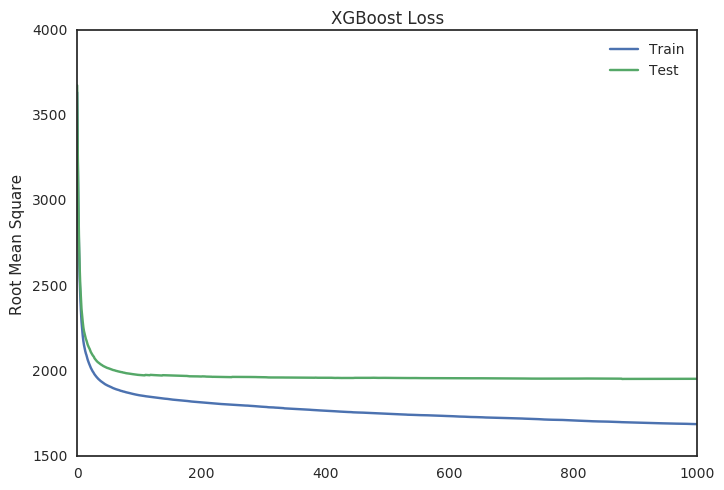

In [100]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend() 
pyplot.ylabel('Root Mean Square') 
pyplot.title('XGBoost Loss') 
pyplot.show()


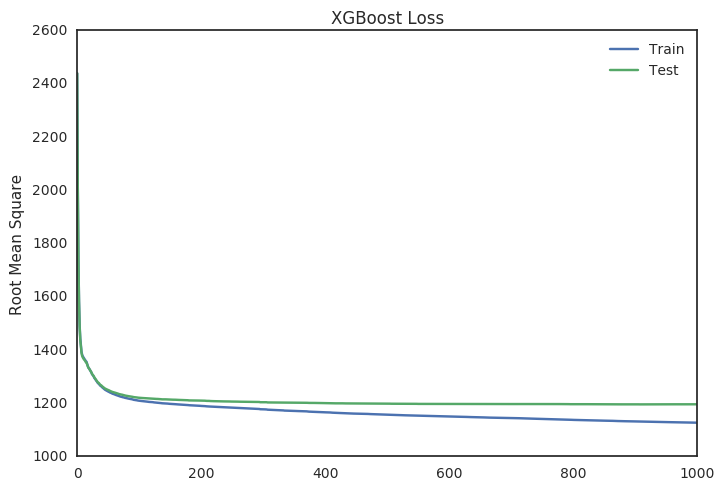

In [101]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend() 
pyplot.ylabel('Mean absolute Error') 
pyplot.title('XGBoost Loss') 
pyplot.show()